# Credit Card Fraud Detection using Unsupervised Algorithms

## Import Packages

In [1]:
import warnings
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import CLARA, KMedoids
from sklearn import metrics
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE, ADASYN

import seaborn as sns

from tabulate import tabulate

warnings.filterwarnings("ignore")
plt.rcParams.update({'font.family': 'Helvetica'})
COLORS = ['blue', 'red']
# sns.set_palette("bright")

## Read Dataset

Dataset is available on https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

# df.drop(['V23', 'V22', 'V26', 'V15', 'V13', 'V25', 'V24', 'V8', 'V28', 'Amount', 'V27',], axis=1, inplace=True)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Dataset Information

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Check Null Values

In [4]:
df.isnull().sum().max()

0

## Plot Time & Amount Densities

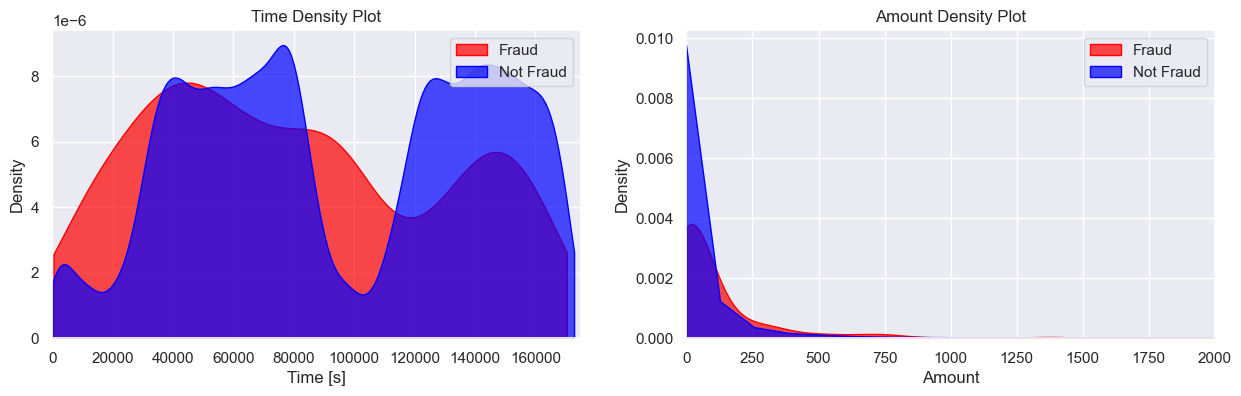

In [5]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.kdeplot(data=df, x='Time', hue='Class', fill=True, common_norm=False, palette=COLORS, alpha=0.7, ax=ax[0], cut=0)
ax[0].set_title('Time Density Plot')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Density')
ax[0].set_xlim(0, 175000)
ax[0].legend(labels=['Fraud', 'Not Fraud'])

sns.kdeplot(data=df, x='Amount', hue='Class', fill=True, common_norm=False, palette=COLORS, alpha=0.7, ax=ax[1], cut=0)
ax[1].set_title('Amount Density Plot')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Density')
ax[1].set_xlim(0, 2000)
ax[1].legend(labels=['Fraud', 'Not Fraud'])

plt.show()

## Plot Class Distribution

In [6]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


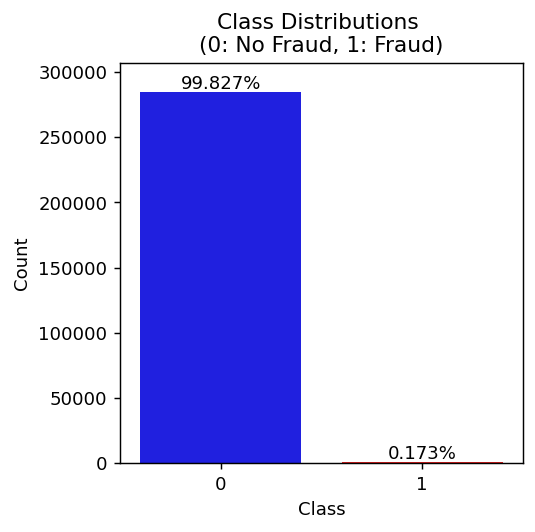

In [7]:
matplotlib.rc_file_defaults()

fig, ax = plt.subplots(figsize=(4, 4), dpi=130)

sns.countplot(data=df, x='Class', palette=COLORS, ax=ax)

ax.set_title('Class Distributions \n(0: No Fraud, 1: Fraud)', fontsize=12)
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/df.shape[0])*100:0.3f}%')
ax.margins(y=0.08)
ax.set_xlabel('Class')
ax.set_ylabel('Count');

## Create a 50/50 Equally Sample

In [8]:
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.sample(frac=1).loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

sample_df = normal_distributed_df.sample(frac=1, random_state=42)

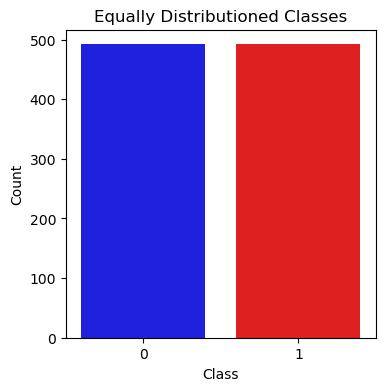

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.countplot(data=sample_df, x='Class', palette=COLORS, ax=ax)

ax.set_title('Equally Distributioned Classes', fontsize=12)
ax.set_xlabel('Class')
ax.set_ylabel('Count');

## Correlation Matrix

**Negative Class Correlation**: V14, V12, V10, V3 (Lower these features, Higher fraud possibility)

**Positive Class Correlation**: V2, V4, V11, V19 (Higher these features, Higher fraud possibility)

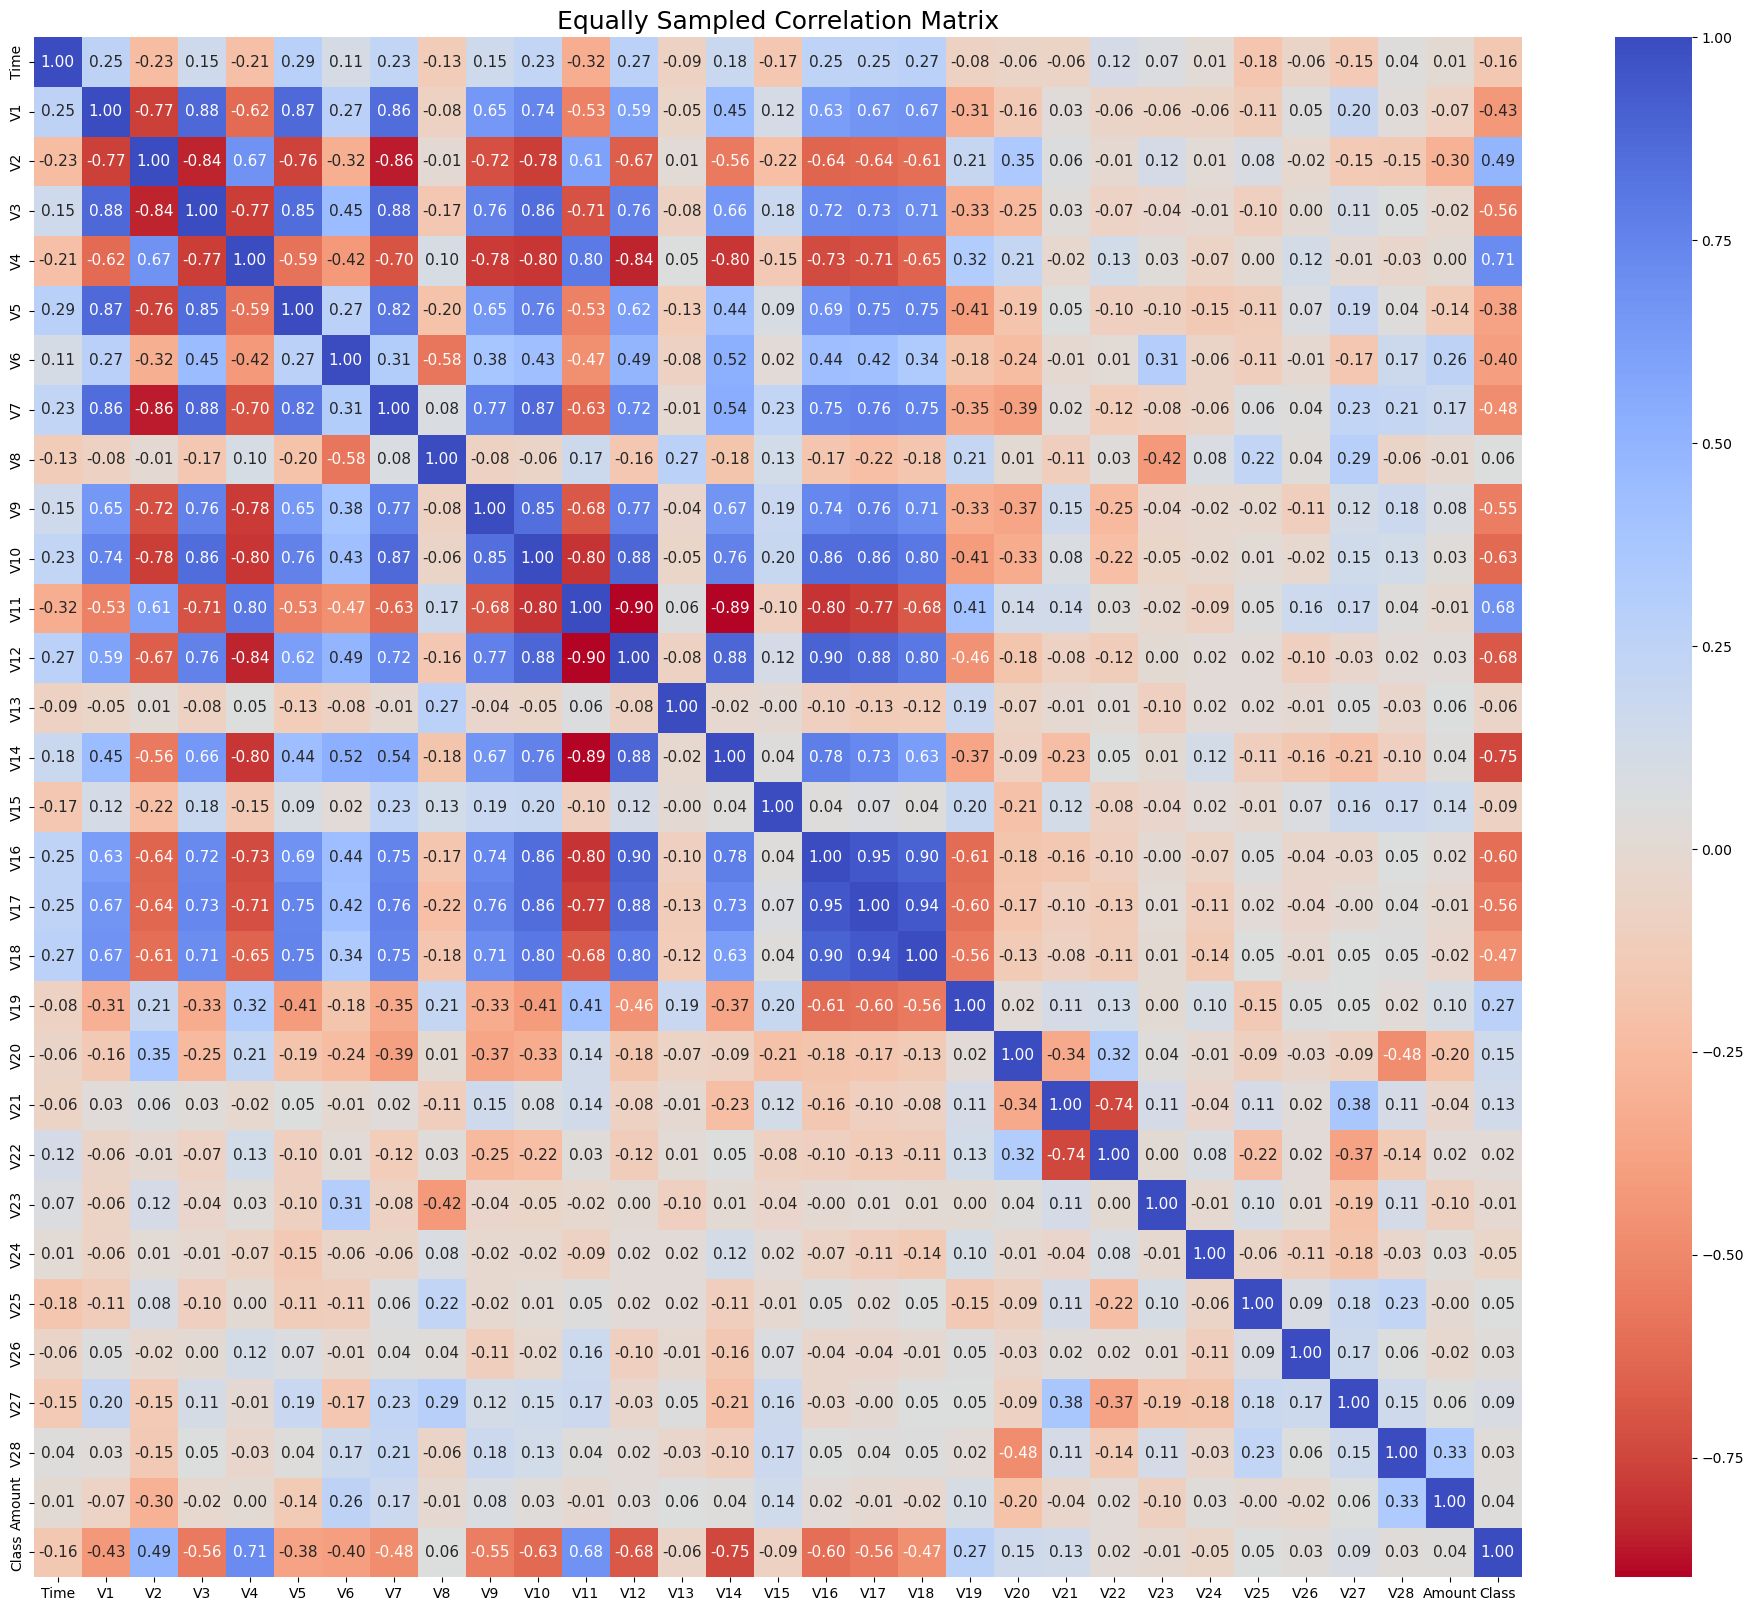

In [10]:
f, ax = plt.subplots(figsize=(24,20))
# coolwarm_r
sample_corr = sample_df.corr()
sns.heatmap(sample_corr, annot_kws={'size':11}, ax=ax, cmap='coolwarm_r', fmt=".2f", annot=True)
ax.set_title('Equally Sampled Correlation Matrix', fontsize=18)
plt.show()

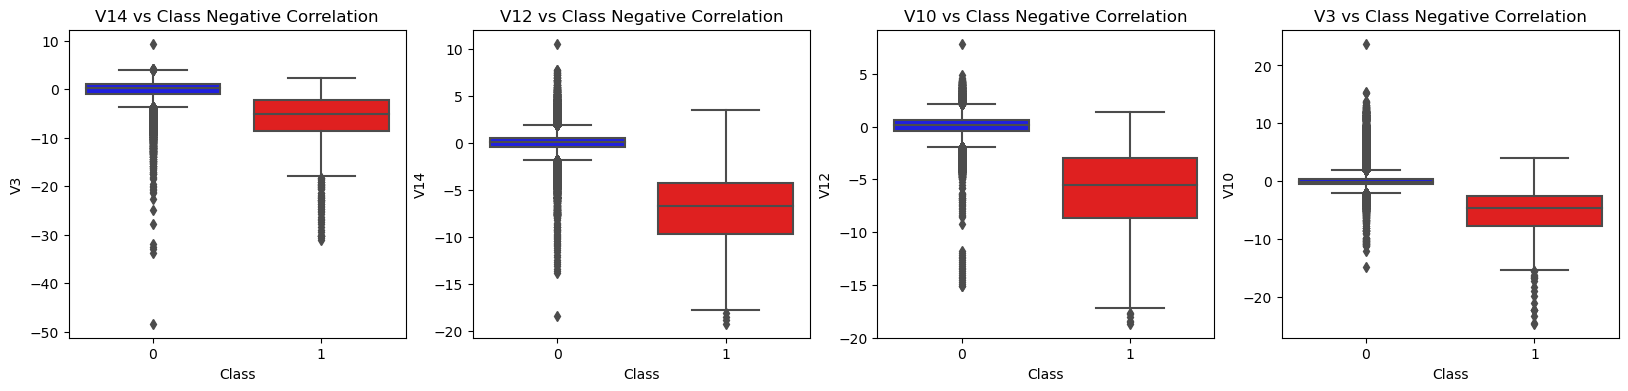

In [11]:
fig, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V14", data=df, palette=COLORS, ax=axes[1])
axes[0].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=df, palette=COLORS, ax=axes[2])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=df, palette=COLORS, ax=axes[3])
axes[2].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V3", data=df, palette=COLORS, ax=axes[0])
axes[3].set_title('V3 vs Class Negative Correlation')

plt.show()

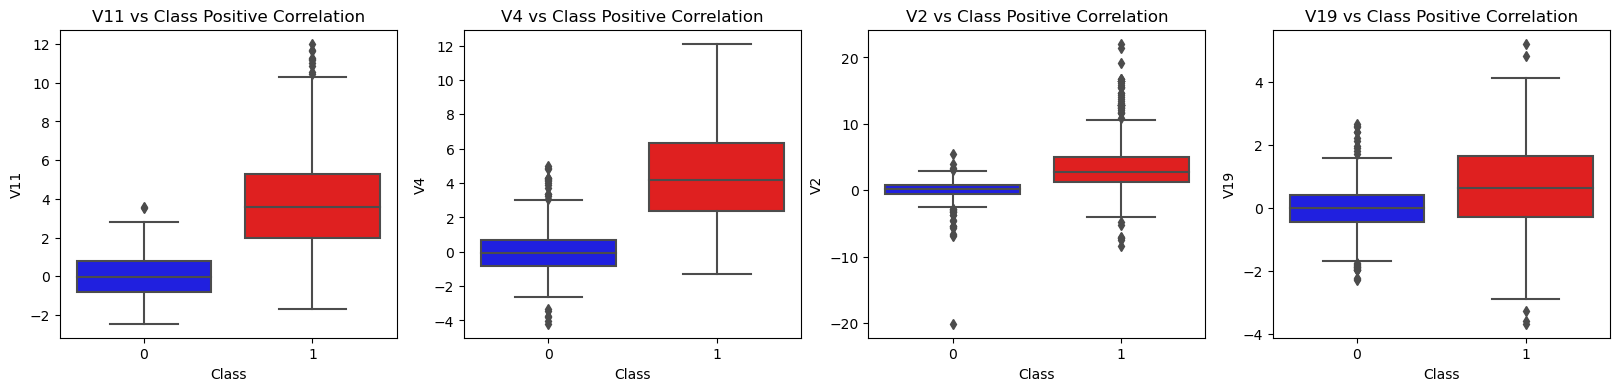

In [12]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=sample_df, palette=COLORS, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=sample_df, palette=COLORS, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=sample_df, palette=COLORS, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=sample_df, palette=COLORS, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

## Split into Train, Validation, and Test

In [13]:
def split_train_val_test(df):
    df_target = df['Class']
    df_features = df.drop(columns=['Class'],axis=1)

    df_train, df_test, df_train_target, df_test_target = train_test_split(df_features, df_target, test_size=0.2, random_state=42, stratify=df_target)
    df_train, df_val, df_train_target, df_val_target = train_test_split(df_train, df_train_target, test_size=0.125, random_state=42, stratify=df_train_target)
    return df_train, df_train_target, df_val, df_val_target, df_test, df_test_target

## Preprocessing Function

In [14]:
def preprocess(df_train, df_train_target, df_val, df_val_target, df_test, df_test_target, oversampling_rate):
    df_train.drop(['Time'], axis=1, inplace=True)
    df_val.drop(['Time'], axis=1, inplace=True)
    df_test.drop(['Time'], axis=1, inplace=True)
    
    if oversampling_rate != 0:
        oversampling = SMOTE(random_state=42, sampling_strategy=oversampling_rate) 
        df_train, df_train_target = oversampling.fit_resample(df_train, df_train_target)
    
    std_scalar = StandardScaler()
    df_train['Amount'] = std_scalar.fit_transform(df_train['Amount'].values.reshape(-1,1))
    df_val['Amount'] = std_scalar.transform(df_val['Amount'].values.reshape(-1,1))
    df_test['Amount'] = std_scalar.transform(df_test['Amount'].values.reshape(-1,1))
    
    X_train = df_train.to_numpy()
    X_val = df_val.to_numpy()
    X_test = df_test.to_numpy()
    y_train = df_train_target.to_numpy().reshape(X_train.shape[0], 1)
    y_val = df_val_target.to_numpy().reshape(X_val.shape[0], 1)
    y_test = df_test_target.to_numpy().reshape(X_test.shape[0], 1)
    
    return df_train, df_train_target, df_val, df_val_target, df_test, df_test_target, X_train, y_train, X_val, y_val, X_test, y_test

## Evaluate Function

In [15]:
def evaluate_model(Y_original, Y_predict):
    auc = metrics.roc_auc_score(Y_original, Y_predict)
    Y_predict = (Y_predict > 0.5) * 1
    accuracy = metrics.accuracy_score(Y_original, Y_predict)
    precision = metrics.precision_score(Y_original, Y_predict)
    recall = metrics.recall_score(Y_original, Y_predict)
    
    try:
        f1_score = metrics.f1_score(Y_original, Y_predict)
    except: 
        f1_score = 0
    try:
        mcc = metrics.matthews_corrcoef(Y_original, Y_predict)
    except:
        mcc = 0
    
    return (accuracy, recall, precision, f1_score, auc, mcc)

## Unsupervised Algorithms

### CLARA

In [16]:
def perform_clara(range_k, X_train, y_train, X_val, y_val, X_test, y_test, fraud_ratio_threshold=0.5):
    fraud_percentages = []
    train_scores = []
    validation_scores = []
    test_scores = {}
    data_clusters = []
    all_data = {}
    for k in range_k:
        clustering = CLARA(n_clusters=k, random_state=42)
        clustering.fit(X_train)

        predicted_clusters_train = clustering.predict(X_train)
        cluster_to_label = {}
        for i in range(k):
            fraud_percentage = (y_train[predicted_clusters_train == i] == 1).sum() / (predicted_clusters_train == i).sum()
            cluster_to_label[i] = fraud_percentage
            fraud_percentages.append([k, i, fraud_percentage, ])
            data_clusters.append([k, i, fraud_percentage, np.concatenate([X_train[predicted_clusters_train == i], y_train[predicted_clusters_train == i]], axis=1)])
            
        predicted_clusters_train = np.array(list(map(lambda x: cluster_to_label[x], predicted_clusters_train)))
        train_scores.append([k, *evaluate_model(y_train, predicted_clusters_train.reshape(predicted_clusters_train.shape[0], 1))])
        
        predicted_clusters_val = clustering.predict(X_val)
        predicted_clusters_val = np.array(list(map(lambda x: cluster_to_label[x], predicted_clusters_val)))
        validation_scores.append([k, *evaluate_model(y_val, predicted_clusters_val.reshape(predicted_clusters_val.shape[0], 1))])
        
        predicted_clusters_test = clustering.predict(X_test)
        predicted_clusters_test = np.array(list(map(lambda x: cluster_to_label[x], predicted_clusters_test)))
        test_scores[k] = evaluate_model(y_test, predicted_clusters_test.reshape(predicted_clusters_test.shape[0], 1))
        
        all_data[k] = [predicted_clusters_train, predicted_clusters_val, predicted_clusters_test]
    
    fraud_percentages = np.array(fraud_percentages)
    train_scores = np.array(train_scores)
    validation_scores = np.array(validation_scores)
    best_k = int(validation_scores[validation_scores[:,4].argmax()][0])
    
    return fraud_percentages, train_scores, validation_scores, best_k, test_scores[best_k], data_clusters, all_data

In [17]:
def perform_clara_smote(range_k, X_train, y_train, X_val, y_val, X_test, y_test, fraud_ratio_threshold=0.5, os_rate=0.02):
    fraud_percentages = []
    train_scores = []
    validation_scores = []
    test_scores = {}
    data_clusters = []
    all_data = {}
    new_X_train, new_y_train = np.copy(X_train), np.copy(y_train)
    for k in range_k:
        _s=time.time()
        clustering = CLARA(n_clusters=k, random_state=42)
        clustering.fit(new_X_train)
        
        new_X_train = new_X_train[:X_train.shape[0]]
        new_y_train = new_y_train[:y_train.shape[0]]
        
        predicted_clusters_train = clustering.predict(X_train)
        cluster_to_label = {}
        for i in range(k):
            fraud_percentage = (y_train[predicted_clusters_train == i] == 1).sum() / (predicted_clusters_train == i).sum()
            cluster_to_label[i] = fraud_percentage
            
            try:
                oversampling = SMOTE(random_state=42, sampling_strategy={1: int(X_train[predicted_clusters_train == i].shape[0] * os_rate)}) 
                new_X_train_temp, new_y_train_temp = oversampling.fit_resample(X_train[predicted_clusters_train == i], y_train[predicted_clusters_train == i])

                new_X_train = np.concatenate([new_X_train, new_X_train_temp[X_train[predicted_clusters_train == i].shape[0]:]])
                new_y_train = np.concatenate([new_y_train, new_y_train_temp[y_train[predicted_clusters_train == i].shape[0]:].reshape(-1, 1)])
            except:
                ...
            
            fraud_percentages.append([k, i, fraud_percentage, ])
            data_clusters.append([k, i, fraud_percentage, np.concatenate([X_train[predicted_clusters_train == i], y_train[predicted_clusters_train == i]], axis=1)])
        
        predicted_clusters_train = np.array(list(map(lambda x: cluster_to_label[x], predicted_clusters_train)))
        train_scores.append([k, *evaluate_model(y_train, predicted_clusters_train.reshape(predicted_clusters_train.shape[0], 1))])
        
        predicted_clusters_val = clustering.predict(X_val)
        predicted_clusters_val = np.array(list(map(lambda x: cluster_to_label[x], predicted_clusters_val)))
        validation_scores.append([k, *evaluate_model(y_val, predicted_clusters_val.reshape(predicted_clusters_val.shape[0], 1))])
        
        predicted_clusters_test = clustering.predict(X_test)
        predicted_clusters_test = np.array(list(map(lambda x: cluster_to_label[x], predicted_clusters_test)))
        all_data[k] = [predicted_clusters_train, predicted_clusters_val, predicted_clusters_test]
        _t=time.time()-_s
        test_scores[k] = (*evaluate_model(y_test, predicted_clusters_test.reshape(predicted_clusters_test.shape[0], 1)),_t)  
    
    fraud_percentages = np.array(fraud_percentages)
    train_scores = np.array(train_scores)
    validation_scores = np.array(validation_scores)
    best_k = int(validation_scores[validation_scores[:,4].argmax()][0])
    best_k_auc = int(validation_scores[validation_scores[:,5].argmax()][0])
    
    return fraud_percentages, train_scores, validation_scores, best_k, test_scores[best_k], data_clusters, all_data

## Execution

In [18]:
result_with_oversampling = []

### CLARA

In [19]:
df_train, df_train_target, df_val, df_val_target, df_test, df_test_target = split_train_val_test(df)
df_train, df_train_target, df_val, df_val_target, df_test, df_test_target, X_train, y_train, X_val, y_val, X_test, y_test = preprocess(df_train, df_train_target, df_val, df_val_target, df_test, df_test_target, oversampling_rate=0)

In [20]:
fraud_percentage, train_scores, validation_scores, best_k, best_test_score, data_clusters, all_data = perform_clara_smote(range(4, 40), X_train, y_train, X_val, y_val, X_test, y_test)
train_scores = pd.DataFrame(train_scores, columns=['k', 'accuracy', 'recall', 'precision', 'f1_score', 'auc', 'mcc'])
validation_scores = pd.DataFrame(validation_scores, columns=['k', 'accuracy', 'recall', 'precision', 'f1_score', 'auc', 'mcc'])
result_with_oversampling.append(['CLARA', *best_test_score])

In [21]:
best_test_score

(0.9993328885923949,
 0.7857142857142857,
 0.8191489361702128,
 0.8020833333333333,
 0.9075949562436116,
 0.8019239952724871,
 1.2485511302947998)

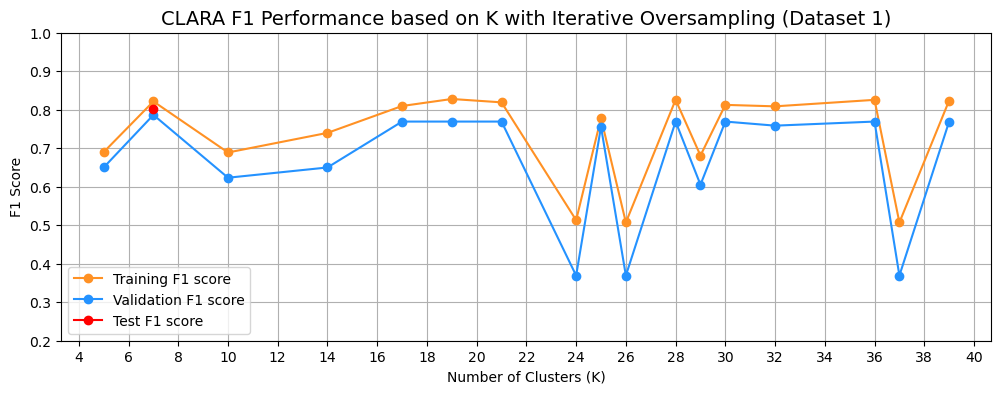

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(train_scores[train_scores['f1_score'] > 0.1]['k'], train_scores[train_scores['f1_score'] > 0.1]['f1_score'], 'o-', color="#ff9124",
         label="Training F1 score")
ax.plot(validation_scores[train_scores['f1_score'] > 0.1]['k'], validation_scores[train_scores['f1_score'] > 0.1]['f1_score'], 'o-', color="#2492ff",
         label="Validation F1 score")
ax.plot(best_k, best_test_score[3], 'o-', color="#ff0000", 
         label="Test F1 score")

ax.xaxis.set_major_locator(plt.MultipleLocator(2));
ax.set_title("CLARA F1 Performance based on K with Iterative Oversampling (Dataset 1)", fontsize=14)
ax.set_xlabel('Number of Clusters (K)')
ax.set_ylabel('F1 Score')
ax.set_ylim(0.2, 1)
ax.grid(True)
ax.legend();

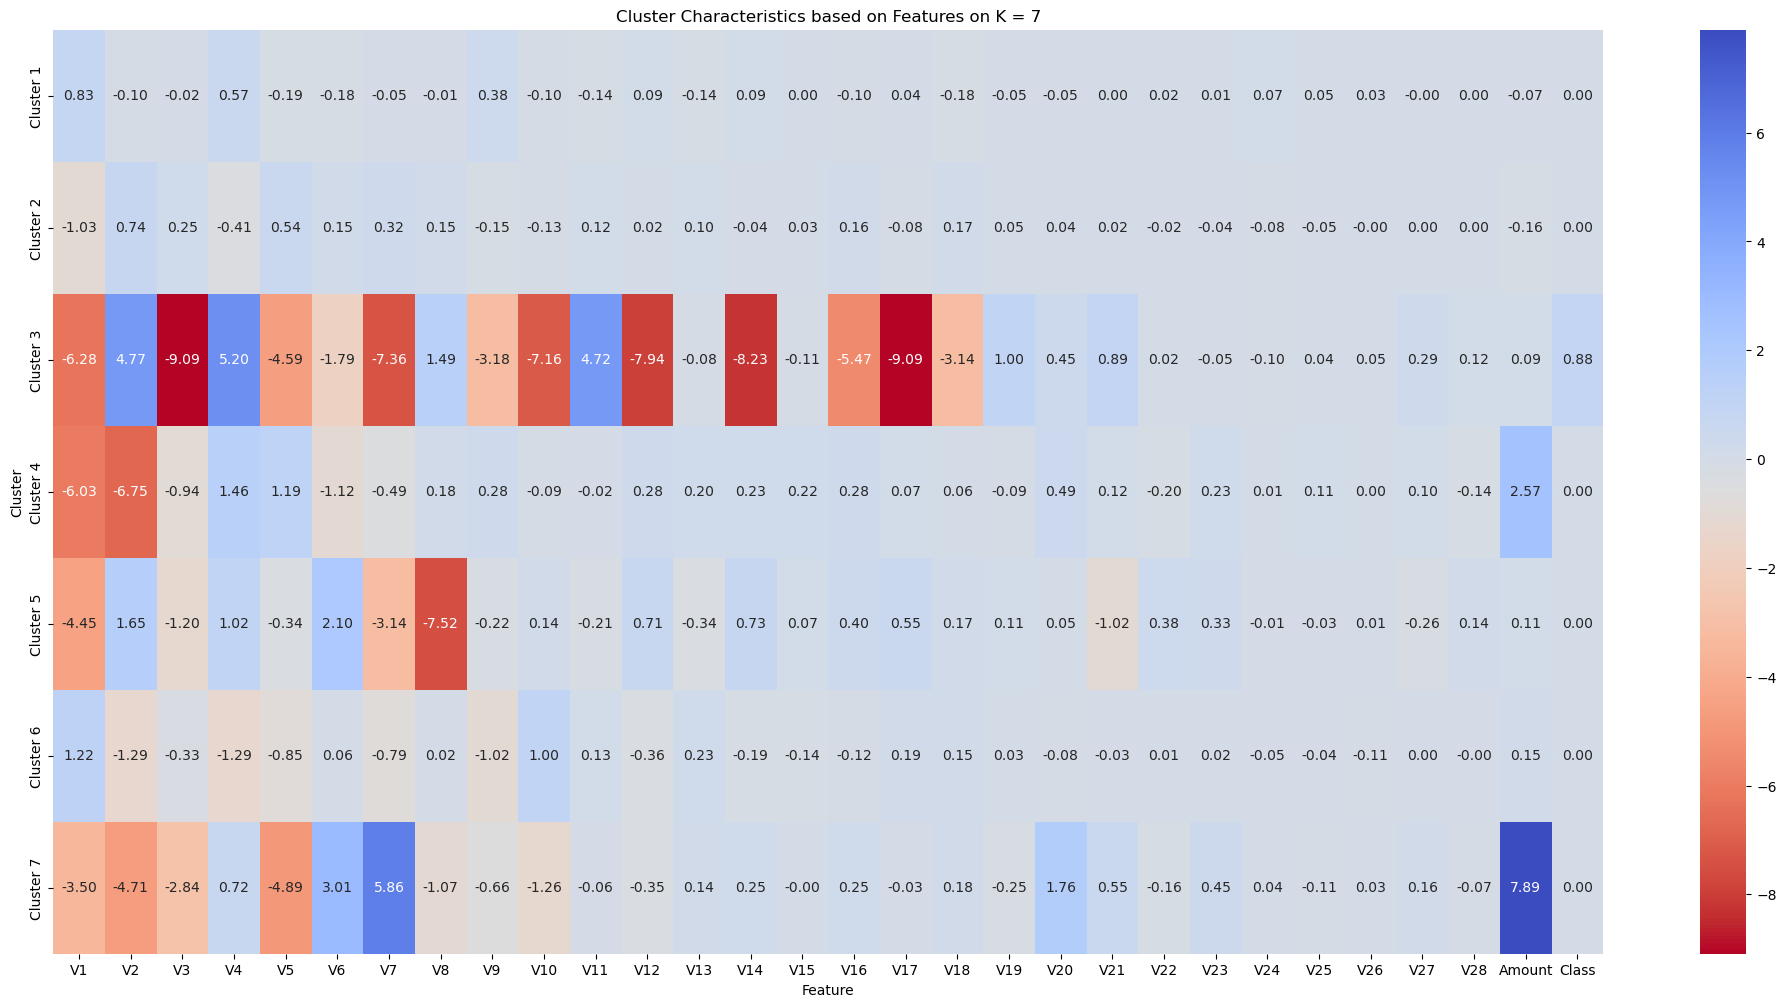

In [24]:
def make_heatmap(cluster_data, k):
    cluster_means = []
    for i in range(k):  # Assuming 3 clusters
        cluster_mean = np.mean(cluster_data[i], axis=0)
        cluster_means.append(cluster_mean)

    # Convert list of cluster means to a numpy array
    cluster_means = np.array(cluster_means)

    # Create a heatmap to visualize the cluster characteristics
    plt.figure(figsize=(25, 12))
    sns.heatmap(cluster_means, cmap='coolwarm_r', annot=True, fmt=".2f", 
                xticklabels=[df.columns[i] for i in range(1, 31)],
                yticklabels=[f'Cluster {i + 1}' for i in range(k)])
    plt.title(f'Cluster Characteristics based on Features on K = {k}')
    plt.xlabel('Feature')
    plt.ylabel('Cluster')
    plt.show()
    
make_heatmap(list(map(lambda x: x[3], data_clusters[15:22])), 7)

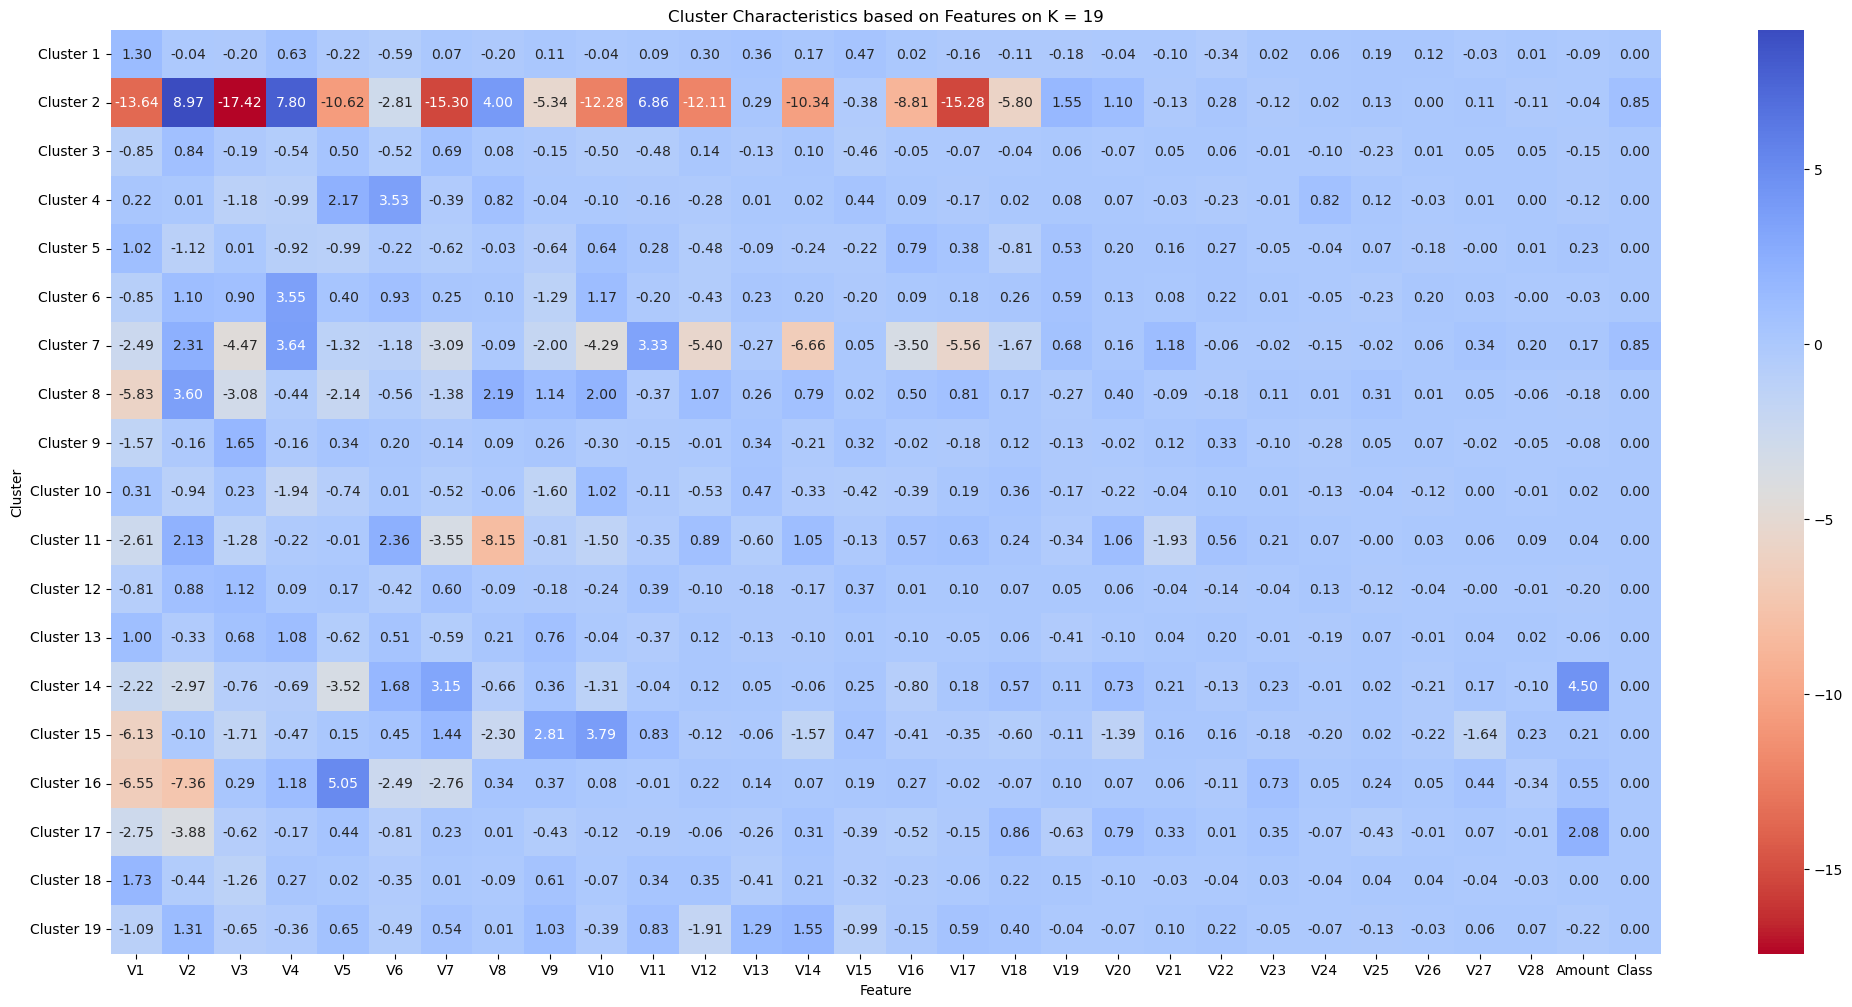

In [25]:
data_clusters[165:184]
make_heatmap(list(map(lambda x: x[3], data_clusters[165:184])), 19)